In [1]:
import sys
sys.path.insert(1, '../')  # to load from any submodule in the repo

import utils.dpcr_utils as utils

import numpy as np
import scipy as sp
import scipy.optimize
import scipy.misc
import matplotlib
import matplotlib.pyplot as plt
import scipy.spatial
import time

In [2]:
b2 = 0.999

L = 2000

W = [1] * L 
p = [1] * L 

for t in range(L):
    p[t] = 2 / (1-b2) - 1 - (2 * (t+1) * b2 ** (t+1)) / (1-b2**(t+1) + 0.0000001)

for i in range(L):
    W[i] = (b2 ** i - b2 ** (i+1)) / (1-b2 ** L)
    #W[i] = W[i-1] * b2

    
rho = 2 / (1-b2) - 1 - (2 * L * b2 ** L) / (1-b2**L + 0.0000000000000000000000001)
C = (rho+1)/2
C2 = np.log((1+b2**(L+1))/2) / np.log(b2) -1

ema_left = 0
ema_right = 0

for i in range(L):
    if (i<C2):
        ema_left += W[i]
    else:
        ema_right += W[i]
    
print ("rho:", rho)
print ("C:", C)
print ("C2:", C2)
print ("ema_left:", ema_left)
print ("ema_right:", ema_right)

    

rho: 1373.6534979907647
C: 687.3267489953823
C2: 565.1742284242689
ema_left: 0.49996376225717143
ema_right: 0.5000362377428282


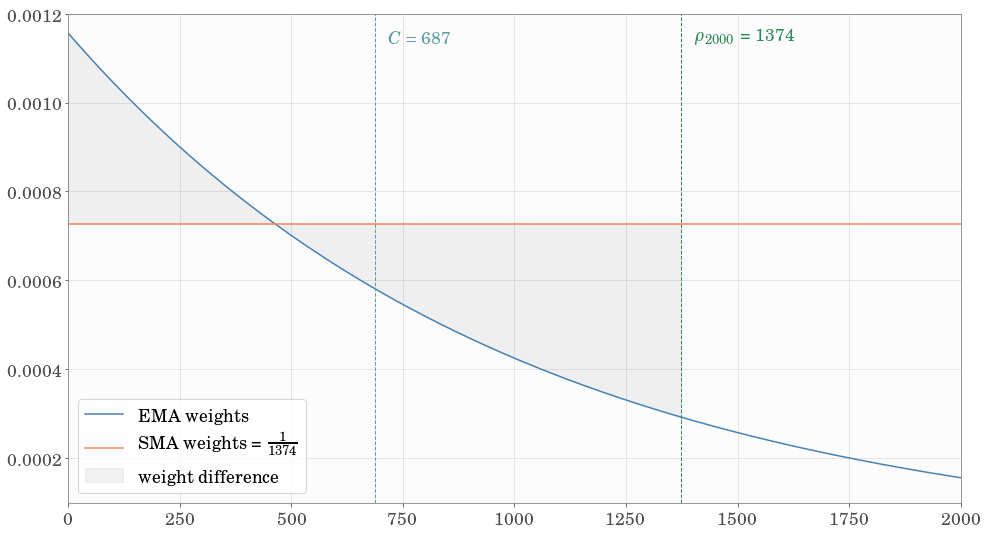

In [6]:
from matplotlib import rcParams
rcParams['font.family'] = 'Century Schoolbook'
rcParams['font.cursive'] = 'Century Schoolbook'
rcParams['font.size'] = '19'

rcParams['text.usetex'] = True 
rcParams['text.latex.preamble'] = [r'\usepackage{fouriernc}']
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = 'cm'

fig = plt.figure(figsize=(16,9))

ax = plt.axes()

plt.setp(ax.spines.values(), color=3 * [0.5])
ax.set_facecolor(3 * [0.99])
ax.tick_params(axis='x', colors=3 * [0.3])
ax.tick_params(axis='y', colors=3 * [0.3])

rho = int(np.round(p[-1]))
ax.plot(W, label='EMA weights', color='steelblue')
ax.axvline(x=C, color='cadetblue', linestyle='--',linewidth=1.0)
ax.text(C + L*0.015, 0.98 * W[0], r'$C=%d$' % C, color = 'cadetblue')
ax.axvline(x=rho-1, color='seagreen', linestyle='--',linewidth=1.0)
ax.text(rho-1 + L*0.015, 0.98 * W[0], r'$\rho_{%d}$ = %d' % (L, rho), color = 'seagreen')
ax.axhline(y=1/rho, color='coral', label=r'SMA weights = $\frac{1}{%d}$' % (rho))
#plt.text(L*0.01, 0.975 * 1/rho, r'SMA weight = $\frac{1}{%d}$' % (rho), color = 'green')
ax.fill_between(np.arange(rho), W[:rho], 1/rho, alpha=0.1, label='weight difference', color='grey')

ax.set_ylim(0.0001, 0.0012)
ax.set_xlim(0,L)

#for i in range(6):
#    plt.axhline(y = i * 0.0002, color='grey', alpha=0.1)

ax.set_axisbelow(True)
ax.grid(color=3 * [0.88])
ax.legend(loc='lower left')

plt.savefig('radam_ema_sma_comp.pdf')